In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.11 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

additional_workshop_representation_learning_and_search_images.ipynb
data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb
workshop_8_pca_clustering.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [4]:
! git pull


fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


## Add import path

In [5]:
import os
import sys
import gc

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
del module_path

## Organize imports

In [8]:
import multiprocessing
from pathlib import Path

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures, 
                                   SplineTransformer, LabelEncoder)
from sklearn.feature_selection import (SequentialFeatureSelector as SFS, 
                                       SelectFromModel)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)


#### Number of CPU cores

In [11]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [20]:
DATA = Path('data')
PATH = DATA / 'log_regr_lda_qda_np'
LR_PATH = DATA / 'linear_regression'
PUMPKIN_DIR = PATH / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = PATH / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [21]:
SEED = 2023

In [22]:
! ls

additional_workshop_representation_learning_and_search_images.ipynb
data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb
workshop_8_pca_clustering.ipynb


## Load IRIS dataset

#### Load dataset

In [23]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [24]:
df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [25]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [27]:
y = df['Species']
X = df.drop(columns=['Id', 'Species'], axis=1)
X.shape, y.shape, df['Species'].value_counts()

((150, 4),
 (150,),
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

In [51]:
y_train

9          Iris-setosa
38         Iris-setosa
18         Iris-setosa
119     Iris-virginica
98     Iris-versicolor
            ...       
52     Iris-versicolor
116     Iris-virginica
3          Iris-setosa
25         Iris-setosa
87     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [52]:
LB_DCT = dict(Setosa=0, 
              Versicolor=1, 
              Virginica=2)

In [53]:
y_train_ch = [LB_DCT[yt.replace('Iris-', '').title()] for yt in y_train]
y_train_ch = np.array(y_train_ch)
y_train_ch

array([0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 0, 1])

In [54]:
y_test_ch = [LB_DCT[yt.replace('Iris-', '').title()] for yt in y_test]
y_test_ch = np.array(y_test_ch)
y_test_ch

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

## Scaling / standartizing the parameters

In [64]:
scaler = StandardScaler().fit(X_train)

In [65]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA Decomposition on IRIS dataset

In [66]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

## Plotting the results

In [67]:
def plot_clusters(X_pc, y_ch):
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()

    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    plt.cla()
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        ax.text3D(
            X_pc[y_ch == label, 0].mean(),
            X_pc[y_ch == label, 1].mean() + 1.5,
            X_pc[y_ch == label, 2].mean(),
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
        )
    # Reorder the labels to have colors matching the cluster results
    y_chf = np.choose(y_ch, [1, 2, 0]).astype(float)
    ax.scatter(
        X_pc[:, 0], X_pc[:, 1], X_pc[:, 2], 
        c=y_chf, cmap=plt.cm.nipy_spectral, edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    plt.show()

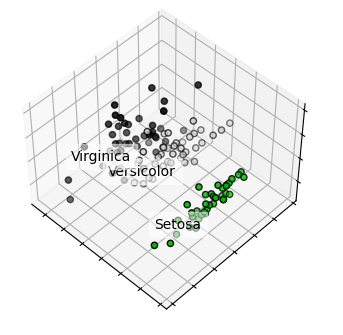

In [68]:
plot_clusters(X_train_pc, y_train_ch)

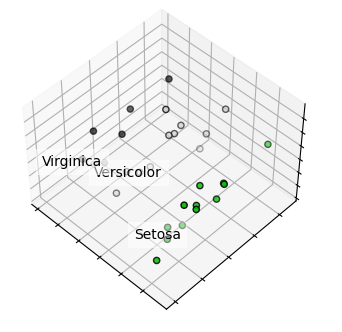

In [69]:
plot_clusters(X_test_pc, y_test_ch)

```python
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
    ax.text3D(
        X_train_pc[y_train_ch == label, 0].mean(),
        X_train_pc[y_train_ch == label, 1].mean() + 1.5,
        X_train_pc[y_train_ch == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y_train_chf = np.choose(y_train_ch, [1, 2, 0]).astype(float)
ax.scatter(
    X_train_pc[:, 0], X_train_pc[:, 1], X_train_pc[:, 2], 
    c=y_train_chf, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()
```

$$ 
 \sigma^2 = \frac{1}{N - 1} \sum_{i=1}^{N}(x - \mu)^2
$$

## Classification SVM

In [70]:
cls_rbf = SVC(C=1.0, 
              kernel='rbf', 
              verbose=True,
              decision_function_shape='ovr',
              random_state=2022)

## Train models

In [71]:
cls_rbf = cls_rbf.fit(X_train_pc, y_train)
cls_rbf

[LibSVM]*
optimization finished, #iter = 27
obj = -2.793475, rho = 0.028846
nSV = 11, nBSV = 1
*
optimization finished, #iter = 60
obj = -2.685403, rho = 0.215676
nSV = 12, nBSV = 0
*
optimization finished, #iter = 40
obj = -23.543870, rho = 0.007763
nSV = 36, nBSV = 28
Total nSV = 47


SVC(random_state=2022, verbose=True)

In [72]:
y_pred = cls_rbf.predict(X_test_pc)

In [73]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<AxesSubplot: >

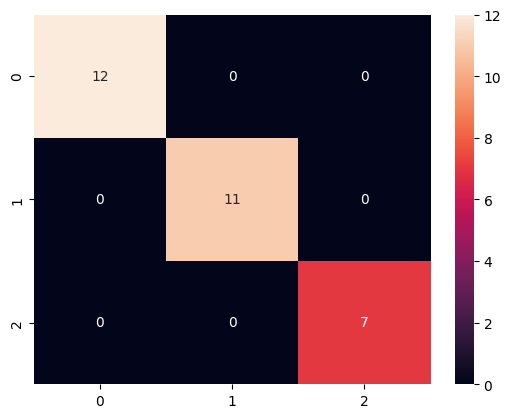

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Clustering for high dimensional features

Clustering of the hig dimensional feature with K-means

#### Initialize model

In [74]:
kmns = KMeans(
    n_clusters=3, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

#### Prepare data

In [78]:
SEED = 2023

In [79]:
studen_scores_path = PUMPKIN_DIR / 'Pumpkin_Seeds_Dataset.xlsx'

In [80]:
df = pd.read_excel(studen_scores_path)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [81]:
df.shape

(2500, 13)

## Data analysis

In [82]:
df['Class'].value_counts() 

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


In [84]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [93]:
y = y.replace('Çerçevelik', 0).replace('Ürgüp Sivrisi', 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=SEED)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1875, 12), (1875,), (625, 12), (625,))

#### Scaling Data

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit the model

In [89]:
y_km_train = kmns.fit_predict(X_train)

In [90]:
y_pred = kmns.predict(X_test)

In [91]:
y_pred

array([1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,

#### Elbow method

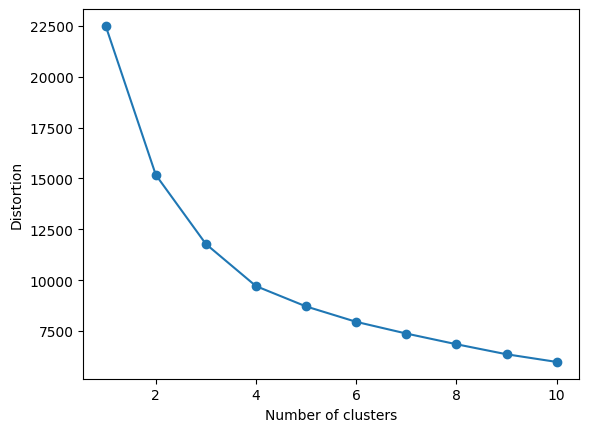

In [92]:
distortions = []
for i in range(1, 11):
    kmns_i = KMeans(
        n_clusters=i, 
        init='random',
        n_init=10, 
        max_iter=300,
        tol=1e-04, 
        random_state=0
    )
    kmns_i.fit(X_train)
    distortions.append(kmns_i.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [95]:
kmns_ch = KMeans(
    n_clusters=8, 
    init='random',
    n_init=10, 
    max_iter=300,
    tol=1e-04, 
    random_state=0
)

In [96]:
kmns_ch = kmns_ch.fit(X_train)
y_km_train = kmns_ch.predict(X_train)
y_km_test = kmns_ch.predict(X_test)

In [97]:
y_km_train

array([0, 0, 2, ..., 1, 4, 6], dtype=int32)

In [98]:
y_km_test

array([4, 7, 0, 2, 4, 4, 6, 2, 0, 2, 3, 3, 2, 2, 2, 2, 4, 1, 3, 2, 4, 7,
       3, 3, 2, 7, 0, 6, 6, 2, 4, 7, 3, 6, 7, 4, 3, 0, 2, 0, 0, 6, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 4, 6, 2, 1, 7, 6, 2, 2, 4, 3, 0, 3, 4, 6, 0,
       1, 0, 3, 6, 3, 1, 7, 0, 6, 6, 1, 3, 1, 6, 6, 6, 6, 0, 2, 0, 0, 3,
       0, 0, 2, 2, 3, 6, 0, 0, 0, 4, 2, 6, 3, 0, 3, 6, 2, 4, 2, 0, 1, 4,
       6, 0, 2, 3, 3, 2, 3, 1, 6, 2, 6, 7, 1, 6, 3, 2, 6, 6, 2, 0, 4, 1,
       4, 6, 0, 6, 0, 2, 6, 2, 4, 1, 0, 6, 0, 2, 6, 4, 0, 2, 3, 3, 6, 2,
       2, 3, 6, 4, 0, 6, 1, 0, 7, 4, 3, 0, 0, 0, 0, 7, 0, 3, 2, 7, 4, 4,
       1, 0, 2, 6, 6, 2, 0, 2, 0, 7, 7, 3, 0, 0, 6, 0, 7, 0, 1, 6, 4, 4,
       6, 2, 3, 7, 1, 4, 3, 0, 7, 2, 4, 2, 6, 2, 2, 6, 2, 3, 2, 2, 4, 7,
       0, 6, 0, 2, 0, 7, 3, 6, 4, 2, 7, 3, 0, 2, 1, 4, 0, 6, 7, 2, 7, 6,
       3, 6, 0, 2, 2, 7, 1, 7, 3, 4, 0, 1, 2, 7, 3, 4, 3, 1, 3, 2, 0, 3,
       6, 3, 6, 1, 2, 6, 6, 6, 0, 2, 4, 0, 6, 2, 0, 0, 3, 2, 6, 3, 4, 1,
       0, 2, 1, 0, 0, 0, 7, 0, 0, 0, 2, 5, 6, 6, 1,

In [99]:
y_km_test.shape, y_test.shape

((625,), (625,))

In [100]:
for idx, cl in enumerate(y_km_test):
    print(idx, cl)

0 4
1 7
2 0
3 2
4 4
5 4
6 6
7 2
8 0
9 2
10 3
11 3
12 2
13 2
14 2
15 2
16 4
17 1
18 3
19 2
20 4
21 7
22 3
23 3
24 2
25 7
26 0
27 6
28 6
29 2
30 4
31 7
32 3
33 6
34 7
35 4
36 3
37 0
38 2
39 0
40 0
41 6
42 1
43 0
44 2
45 0
46 1
47 2
48 2
49 0
50 2
51 4
52 6
53 2
54 1
55 7
56 6
57 2
58 2
59 4
60 3
61 0
62 3
63 4
64 6
65 0
66 1
67 0
68 3
69 6
70 3
71 1
72 7
73 0
74 6
75 6
76 1
77 3
78 1
79 6
80 6
81 6
82 6
83 0
84 2
85 0
86 0
87 3
88 0
89 0
90 2
91 2
92 3
93 6
94 0
95 0
96 0
97 4
98 2
99 6
100 3
101 0
102 3
103 6
104 2
105 4
106 2
107 0
108 1
109 4
110 6
111 0
112 2
113 3
114 3
115 2
116 3
117 1
118 6
119 2
120 6
121 7
122 1
123 6
124 3
125 2
126 6
127 6
128 2
129 0
130 4
131 1
132 4
133 6
134 0
135 6
136 0
137 2
138 6
139 2
140 4
141 1
142 0
143 6
144 0
145 2
146 6
147 4
148 0
149 2
150 3
151 3
152 6
153 2
154 2
155 3
156 6
157 4
158 0
159 6
160 1
161 0
162 7
163 4
164 3
165 0
166 0
167 0
168 0
169 7
170 0
171 3
172 2
173 7
174 4
175 4
176 1
177 0
178 2
179 6
180 6
181 2
182 0
183 2
184 0


In [102]:
clust_dict = dict()
for idx, (cl, y_tst) in enumerate(zip(y_km_test, y_test)):
    clust_dict.setdefault(cl, list())
    clust_dict[cl].append(y_tst)

In [104]:
clust_dict

{4: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 7: [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 0: [0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,

In [119]:
cl_i = np.array(clust_dict[2])
un, ct = np.unique(cl_i, return_counts=True)
ct[0] / (cl_i.shape[0]), ct[1] / (cl_i.shape[0])

(0.9396551724137931, 0.0603448275862069)

In [120]:
cl_i = np.array(clust_dict[3])
un, ct = np.unique(cl_i, return_counts=True)
ct[0] / (cl_i.shape[0]), ct[1] / (cl_i.shape[0])

(0.11688311688311688, 0.8831168831168831)

## Hyerarchial clustering

Hyerarchial clustering on high dimensional data

#### Initialize model

In [135]:
hrch = AgglomerativeClustering(n_clusters=None, distance_threshold=0.02)

In [136]:
hrch = hrch.fit(X_train)

In [137]:
y_hr_train = hrch.fit_predict(X_train)

In [138]:
y_hr_train

array([1259, 1455, 1243, ...,    1,    2,    0])

In [139]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

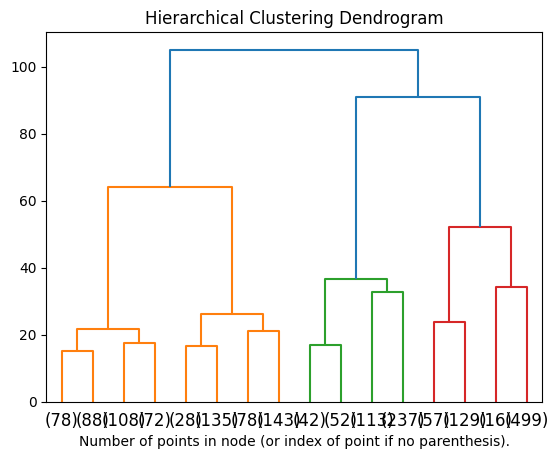

In [140]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hrch, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Test on images

```python
! pip install -U scikit-image
```

In [142]:
from skimage.data import coins

orig_coins = coins()

In [143]:
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale

smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(
    smoothened_coins,
    0.2,
    mode="reflect",
    anti_aliasing=False,
)

X = np.reshape(rescaled_coins, (-1, 1))

In [144]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

In [145]:
import time as time

from sklearn.cluster import AgglomerativeClustering

print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print(f"Elapsed time: {time.time() - st:.3f}s")
print(f"Number of pixels: {label.size}")
print(f"Number of clusters: {np.unique(label).size}")

Compute structured hierarchical clustering...
Elapsed time: 0.169s
Number of pixels: 4697
Number of clusters: 27


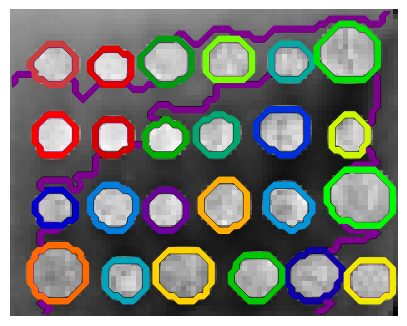

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.axis("off")
plt.show()